In [1]:
# Загрузка зависимостей
import numpy
import pandas
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pandas.read_csv('prepared_data.csv') 
dataset.head(10) # Вывод первых 10 строк

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,1,2,3,4,5,6,7,8
0,0,0.209515,0.305476,0.05,0.05,0.678571,0.572837,1,1,1,0,0,1,0,0,0,0,0
1,1,0.176091,0.000000,0.05,0.05,0.750000,0.572837,1,0,1,0,0,0,0,0,1,0,0
2,2,0.408240,0.347262,0.05,0.05,0.821429,0.254805,1,1,1,0,0,1,0,0,0,0,0
3,3,0.278754,0.238705,0.05,0.05,0.750000,0.572837,1,0,1,1,0,0,0,0,0,0,0
4,4,0.819544,0.652738,0.30,0.30,0.535714,0.572837,0,1,1,0,0,1,0,0,0,0,0
5,5,0.437751,0.496588,0.20,0.20,0.571429,0.572837,1,1,1,0,0,0,0,0,0,0,1
6,6,0.292256,0.283792,0.05,0.05,0.321429,0.752625,0,0,1,0,0,0,0,0,0,0,1
7,7,0.245513,0.215239,0.05,0.05,0.428571,0.430238,1,1,0,0,0,0,1,0,0,0,0
8,8,0.653213,0.593649,0.20,0.20,0.428571,0.430238,1,1,1,0,0,1,0,0,0,0,0
9,9,0.447158,0.513548,0.25,0.25,0.692857,0.752625,1,0,1,0,0,0,0,1,0,0,0


In [3]:
Xx = dataset.iloc[:, [*range(1,7)]]
Xx.head(10)

,price,totsp,livesp,kitsp,dist,metrdist
0,0.209515,0.305476,0.05,0.05,0.678571,0.572837
1,0.176091,0.000000,0.05,0.05,0.750000,0.572837
2,0.408240,0.347262,0.05,0.05,0.821429,0.254805
3,0.278754,0.238705,0.05,0.05,0.750000,0.572837
4,0.819544,0.652738,0.30,0.30,0.535714,0.572837
5,0.437751,0.496588,0.20,0.20,0.571429,0.572837
6,0.292256,0.283792,0.05,0.05,0.321429,0.752625
7,0.245513,0.215239,0.05,0.05,0.428571,0.430238
8,0.653213,0.593649,0.20,0.20,0.428571,0.430238
9,0.447158,0.513548,0.25,0.25,0.692857,0.752625


In [4]:
# Выделение входных и выходных параметров:
# Выходной параметр - значение столбца обработанного набора данных, соответсвующее столбцу №8 из первоначального набора данных (machine.data.csv).
# Входные параметры - все остальные столбцы обработанного набора данных.
# Используем .values, чтобы индексы не попали в новые переменные и в дальнейшем не мешали нам, например, при построении графиков.
X = dataset.iloc[:, [*range(1,7)]].values
Y = dataset['price'].values

# Обратите внимание на структуру вашего обработанного файлы и измените индексы, если нужно.

In [5]:
# Разделение данных на обучающую и тестовую выборки:
# Используем метод train_test_split библиотеки sklearn.
# Он разделяет заданные массивы входных и выходных параметров на две части каждый.
# Значение test_size определяет долю тестовой выборки в исходных данных.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [6]:
# Задаем параметры структуры нейронной сети.


input_layer_size = 6


first_hidden_layer_size = 10
second_hidden_layer_size = 5
third_hidden_layer_size = 10

output_layer_size = 1


epochs_number = 100
batch_size = 16

In [7]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - softmax
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='softmax'))

model.add(Dense(second_hidden_layer_size, activation='softmax'))

model.add(Dense(third_hidden_layer_size, activation='softmax'))



model.add(Dense(output_layer_size, activation='linear'))

In [8]:
# Обзор нейронной сети, теперь в ней есть слои и нейроны.
# Если внимательно посмотреть на количество параметров, т.е. связей между нейронами, то можно увидеть, что автоматически добавлены нейроны смещения.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Настройка нейронной сети.
# Функция потерь (loss) - среднеквадратическая ошибка.
# Оптимизатор (optimizer) - adam (в настоящий момент - это стандартный оптимизатор).
# Указываем метрики средняя абсолютная ошибка (mean_absolute_error) и среднеквадратическая ошиба (mean_squared_error) для дальнейшего анализа.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [10]:
# Обучение нейронной сети.
# На вход передаем обучающие и тестовые выборки, количество эпох и размер батча.
# На выходе получаем объект с историей обучения, который далее будем анализировать.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 1632 samples, validate on 408 samples
Epoch 1/100
1632/1632 [==============================] - 1s 515us/step - loss: 0.0552 - mean_absolute_error: 0.1886 - mean_squared_error: 0.0552 - val_loss: 0.0268 - val_mean_absolute_error: 0.1208 - val_mean_squared_error: 0.0268
Epoch 2/100
1632/1632 [==============================] - 0s 216us/step - loss: 0.0206 - mean_absolute_error: 0.1062 - mean_squared_error: 0.0206 - val_loss: 0.0195 - val_mean_absolute_error: 0.1054 - val_mean_squared_error: 0.0195
Epoch 3/100
1632/1632 [==============================] - 0s 154us/step - loss: 0.0184 - mean_absolute_error: 0.1033 - mean_squared_error: 0.0184 - val_loss: 0.0193 - val_mean_absolute_error: 0.1065 - val_mean_squared_error: 0.0193
Epoch 4/100
1632/1632 [==============================] - 0s 169us/step - loss: 0.0183 - mean_absolute_error: 0.1036 - mean_squared_error: 0.0183 - val_loss: 0.0193 - val_mean_absolute_error: 0.1069 - val_mean_squared_error: 0.0193
Epoch 5/100
1632/1632 [======

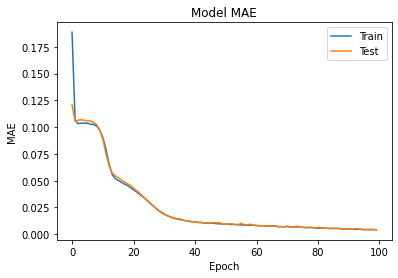

In [11]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

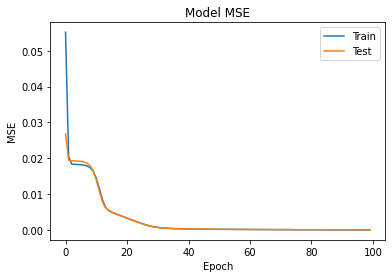

In [12]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
# Видно, что в процессе обучения сеть с каждой эпохой вычисляет всё более точные прогнозы значений Y.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [13]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

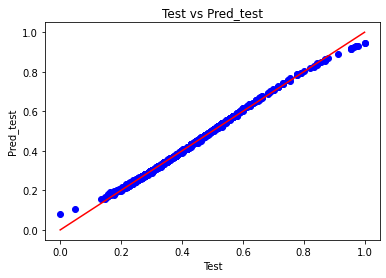

In [14]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
# В идеальной ситуации они должны совпадать, т.е. точки (Y_train[i], Y_pred_train[i]) должны лежать на прямой Y_train = Y_pred_train.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

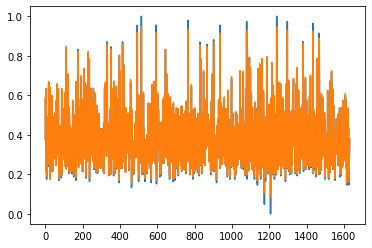

In [15]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [16]:
# Таким образом, обучение по обучающей выборке проведено.
# Теперь проверим работу нейроной сети на тестовой выборке.

# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

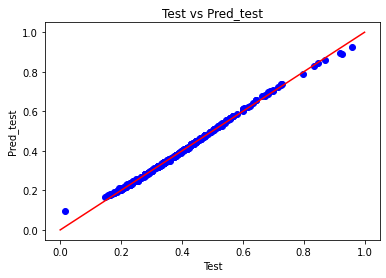

In [17]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

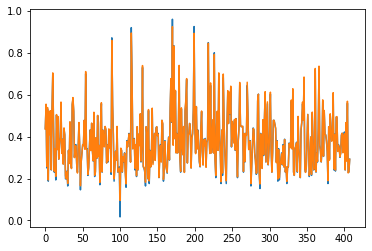

In [18]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [19]:
# Итого, качество работы нейронной сети на тестовых данных ниже, чем на обучающих - это ожидаемо.
# Тем не менее, нейронная сеть способна найти зависимости и предсказвать значение Y по X с приемлемым уровенм точности.

# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(numpy.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(numpy.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.006391469823990244
0.00699244137051472


In [20]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
# Для этого используем библиотеку scipy и метод stats.shapiro.
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.7491748332977295, p = 2.6624670822171524e-44
Test k = 0.7271342277526855, p = 2.612526866159922e-25


In [21]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.7445361614227295, p_s = 0.0
k_n = 836.6610053343808, p_n = 2.0959025199627188e-182


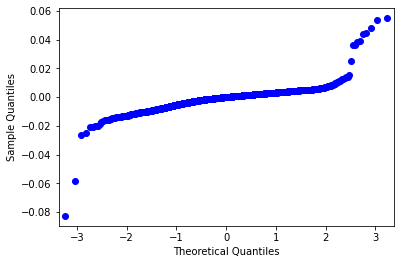

In [22]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

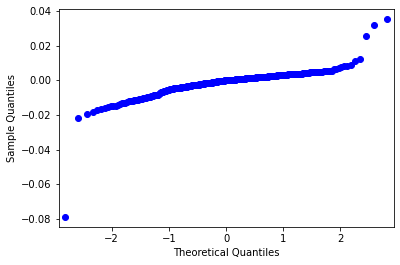

In [23]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

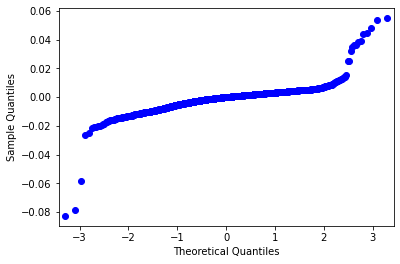

In [24]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

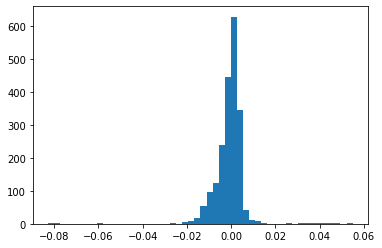

In [25]:
# Можо также визульно убедиться, что распределения "почти нормальное".
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [26]:
# Сохраним обученную нейронную сеть, название файла можно выбрать любое, расширение - h5.
model.save('SimpleNeuralNetwork.h5')